## XMAC02 - Prova Bimestral 1

Nome: Sammuel Gonçalves Reis

Nro Matrícula: 2023004480

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, poisson, stats
from statsmodels.stats import weightstats, proportion

/home/aluno/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Questão 1 \
Utilizando o dataset "house_prices.csv", retire os imóveis que não tem preço (Price == NaN). Em seguida, filtre os imóveis localizados na Regionname "Eastern Metropolitan" e responda os itens a seguir: 

a) Informe a média, a mediana e o desvio padrão do preço das casas de 3 quartos (Rooms = 3). 

b) Gere um boxplot do preço do imóvel por número de quartos. Limite o número de quartos a no máximo 6.

In [3]:
df = pd.read_csv('house_prices.csv')
df = df[~df['Price'].isnull()] # remove NaN
df = df[df['Regionname'] == 'Eastern Metropolitan']

# a)
df3Quartos = df[df['Rooms'] == 3]['Price']
print(f'Média: ${df3Quartos.mean():.2f}')
print(f'Mediana: ${df3Quartos.median():.2f}')
print(f'Desvio padrão: ${df3Quartos.std():.2f}')

Média: $978272.79
Mediana: $907000.00
Desvio padrão: $303208.69


<Axes: title={'center': 'Price'}, xlabel='Rooms'>

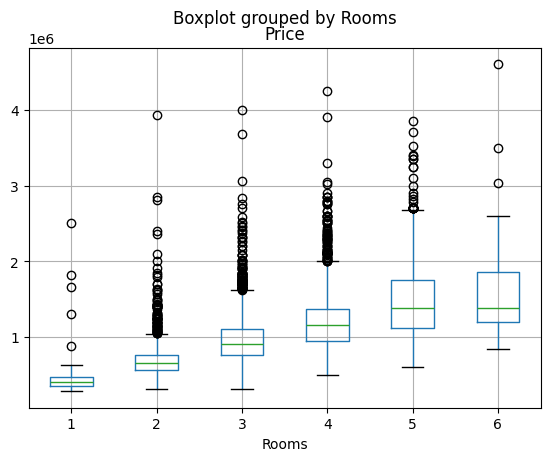

In [4]:
# b)

dfAte6Quartos = df[df['Rooms'] <= 6]
dfAte6Quartos.boxplot(by='Rooms', column='Price')

Questão 2 \
Considere o dataset "house_prices.csv". Plote um gráfico de pizza que mostre a porcentagem de imóveis por região (Regionname) \
Dica: Use o campo Propertycount.

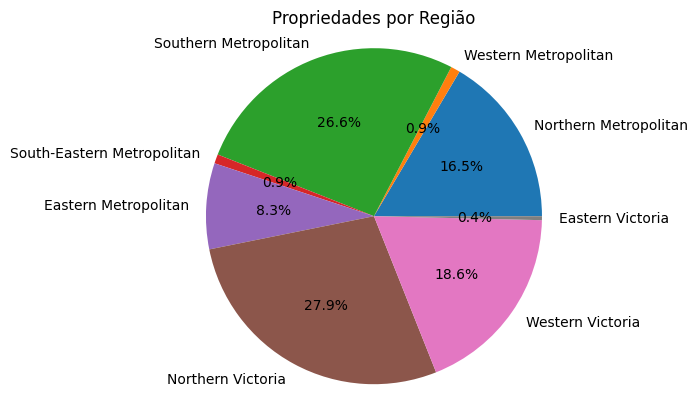

In [20]:
df2 = pd.read_csv('house_prices.csv')
labels = df2['Regionname'].unique()

sizes = df2.groupby('Regionname')['Regionname'].count()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Propriedades por Região')
plt.show()

Questão 3 \
O dataset "insurance.csv" exibe dados de seguro saúde dos EUA (healsh insurance). \
bmi = body mass index (IMC - índice de massa corporal). \
charges = valores cobrados do seguro saúde.

Plote um gráfico que mostre o valor médio pago (charges médio) por fumantes e não fumantes das 4 regiões existentes no dataset.

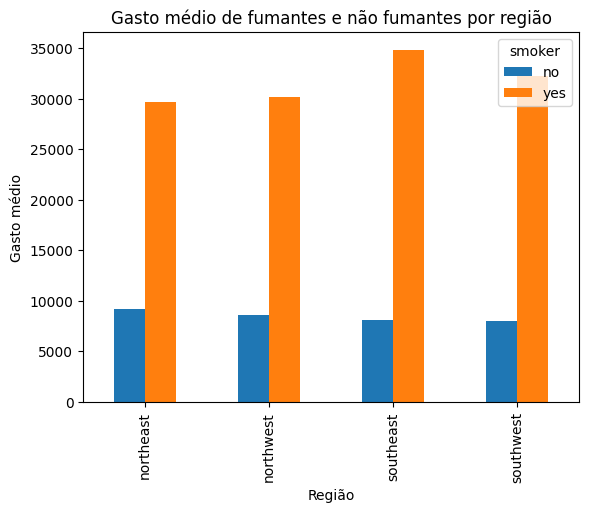

In [33]:
dfIns = pd.read_csv('insurance.csv')
summary = pd.crosstab(dfIns['region'], dfIns['smoker'], values=dfIns['charges'], aggfunc='mean')
summary.plot(kind='bar', stacked=False)

plt.title('Gasto médio de fumantes e não fumantes por região')
plt.xlabel('Região')
plt.ylabel('Gasto médio')
plt.show()


Questão 4 \
Um digitador tem uma taxa de erro média de 0.1% de palavras digitadas. Considerando que a taxa de erros segue uma Distribuição de Poisson: \
a) Qual a probabilidade que um texto contendo 2000 palavras seja digitado sem nenhum erro? \
b) Qual a probabilidade que um texto contendo 3000 palavras apresente no mínimo 3 e não mais que 5 erros


In [38]:
# a)
print(poisson.pmf(0, 0.001 * 2000))

# b)
poisson.sf(2, 0.001 * 3000) - poisson.sf(5, 0.001 * 3000)

0.1353352832366127


0.4928919768418531

Questão 5 \
Pesquisas indicaram que 75% dos eleitores de uma cidade são alfabetizados. Entre 16 eleitores dessa cidade, determine a probabilidade de: \
a) no máximo 1 ser analfabeto; \
b) 3 ou mais serem analfabetos; \
c) pelo menos 1 ser analfabeto.

In [45]:
# a)
# 25% analfabetos = 75% alfabetizados
print(binom.cdf(1, 16, 0.25))

# b) 3 ou mais = sf(3 - 1) = sf(2)
print(binom.sf(2, 16, 0.25))

# c)
binom.sf(1, 16, 0.25) + binom.pmf(1, 16, 0.25)

0.0634764397982508
0.8028889501001686


0.9899774042423815

Questão 6 \
100 alunos de uma classe realizaram uma prova e a média da turma foi 5,8 com desvio padrão 2,5. Assumindo que as notas da turma seguem uma distribuição Normal de probabilidade, responda as questões a seguir. \
a) Quantos alunos tiraram menos que 6,0? \
b) Quantos alunos tiraram entre 6,0 e 8,0? \
c) Quantos alunos tiraram mais que 9,0?


In [54]:
# a)
print(100 * (norm.cdf(6, 5.8, 2.4) - norm.pdf(6, 5.8, 2.4)))

# b)
print(100 * (norm.sf(6, 5.8, 2.4) - norm.sf(8, 5.8, 2.4)))

# c)
print(100 * (norm.sf(9, 5.8, 2.4)))


36.75569742449799
28.713457898259232
9.121121972586781


Questão 7 \
Um digitador tem uma taxa de erro média de 0.1% de palavras digitadas. Considerando que a taxa de erros segue uma Distribuição de Poisson: \
a) Qual a probabilidade que um texto contendo 2000 palavras seja digitado sem nenhum erro? \
b) Qual a probabilidade que um texto contendo 3000 palavras apresente no mínimo 3 e não mais que 5 erros?

In [ ]:
# a)
print(poisson.pmf(0, 0.001 * 2000))

# b)
poisson.sf(2, 0.001 * 3000) - poisson.sf(5, 0.001 * 3000)

Questão 8 \
A resistência média à ruptura das hastes de aço deve ser de pelo menos 35.000 psi. Com base nas informações históricas, o desvio padrão da resistência à ruptura é de 1.500 psi. Decidiu-se realizar um teste de hipótese com uma amostra aleatória de 4 hastes, para decidir se o lote dessas amostras deve ser comprado. Os valores obsevados na amostra foram os seguintes: peça um: 32.000 psi, peça dois: 36.000 psi, peça três: 34.000 psi e peça quatro: 34.500 psi. Num nível de confiança de 95%, o lote deve ser considerado aprovado para compra?
Informe: \
a) O teste realizado; \
b) As hipóteses nula a alternativa; e \
c) O resultado do teste.

μ = 35.000 psi \
desvio padrão  = 1.500 psi \
Alpha = 1 - 0.95 = 0.05 


H0: μ = 35.000 psi \
Ha: μ ≠ 35.000

In [56]:
amostra = [32, 36, 34, 34.5]
media_amostral = np.mean(amostra)

z_calc = (media_amostral - 35) / (1.5 / np.sqrt(4))
z_calc

-1.1666666666666667

In [57]:
weightstats.ztest(x1=amostra, value=35, alternative='two-sided')

(-1.0593098718411684, 0.2894586805670044)

Tendo em vista que P Value é 0.28 (portanto, maior que 0.05), falhamos em rejeitar a hipótese nula. Assim, a média continua sendo 35.000 psi e portanto, o lote pode ser considerado aprovado para compra.

Questão 9 \
Um jogador ganha 48% das mãos que joga, mas sente que está numa sequência de derrotas recentemente, ganhando menos mãos do que o normal. Ele então analisa uma amostra aleatória de 40 de suas mãos recentes e encontra 18 mãos vencedoras. Ele deve concluir que está mesmo numa sequência negativa de derrotas? Analise com confiança de 90%.

μ = 48% \
Alpha = 1 - 0.9 = 0.1 

H0: μ = 48% \
Ha: μ ≠ 48%

In [ ]:

stats.ttest_1samp() # resposta incompleta

Questão 10 \
Suponha que uma máquina envase garrafas de vinho com média 750 ml e desvio padrão de 15 ml. A vinícola decidiu realizar um teste de hipótese com erro alfa = 0,08 e duas caudas. \
a) Obtenha o Z crítico para esse teste. \
b) Considere que tenha sido tomada uma única amostra contendo 726 ml. Obtenha o Z calc e informe o resultado do teste. \
c) Considere que tenham sido tomadas 4 amostras e a média obtida foi 736 ml. Obtenha o Z calc e informe o resultado do teste.

μ = 750ml \
desvio padrão = 15ml \
Alpha = 0.08 

H0: μ = 48% \
Ha: μ ≠ 48%

In [61]:
# a) 
# b)

In [62]:
# c)
z_calculado = (736 - 750) / (15 / np.sqrt(4))
z_calculado

# resposta incompleta

-1.8666666666666667